In [1]:
from data_flywheel import DataFlywheel

/root/miniforge-pypy3/envs/icevision/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [2]:
# Create a configuration dictionary
config = {
    'annotation_path': '/root/data-flywheel/notebooks/objectlab/pascal_voc_annotations/',
    'image_path': '/workspace/yolo_v8_training/oiv7_full/validation/',
    'log_wandb': True,
    'wandb_project': 'data-flywheel-test'
}

# Instantiate the DataFlywheel
flywheel = DataFlywheel(config)


In [3]:
flywheel.load_annotations()

INFO     - Loading image annotations... | data_flywheel.flywheel:load_annotations:30
INFO     -   Annotations folder: /root/data-flywheel/notebooks/objectlab/pascal_voc_annotations/ | data_flywheel.flywheel:load_annotations:32
INFO     -   Image folder: /workspace/yolo_v8_training/oiv7_full/validation/ | data_flywheel.flywheel:load_annotations:33


  0%|          | 0/844 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/844 [00:00<?, ?it/s]

WARNING  - (record_id: 0065e1098f7a353b) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/0065e1098f7a353b.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 00770ee8f5ad87ef) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/00770ee8f5ad87ef.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 00ccda615ec9731d) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/00ccda615ec9731d.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 0160b5826ab10020) - 🚫 Record could not be autofixed and will be removed because: File '/workspace/yolo_v8_training/oiv7_full/validation/0160b5826ab10020.xml' does not exist | icevision.core.record:autofix_records:100
WARNING  - (record_id: 0177ba1593d54279)

INFO     - Loading model... | data_flywheel.flywheel:train_model:56
2024-04-04 09:45:31,892 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2024-04-04 09:45:31,893 - mmcv - INFO - load model from: torchvision://resnet50
2024-04-04 09:45:31,894 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2024-04-04 09:45:31,971 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2024-04-04 09:45:31,989 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2024-04-04 09:45:32,016 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls', 'std': 0.01, 'bias_prob': 0.01}}
2024-04-04 09:45:32,052 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load fr

load checkpoint from local path: checkpoints/vfnet/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([1]).


epoch,train_loss,valid_loss,COCOMetric,time
0,2.183091,1.890707,0.288316,00:25


/root/miniforge-pypy3/envs/icevision/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Better model found at epoch 0 with valid_loss value: 1.8907074928283691.


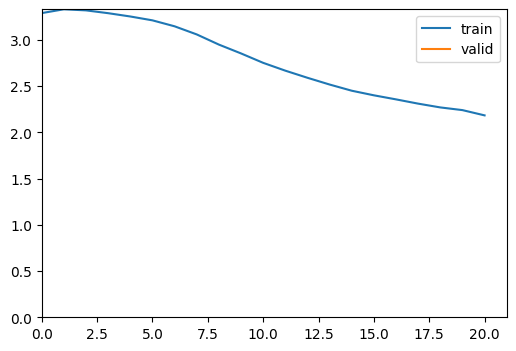

epoch,train_loss,valid_loss,COCOMetric,time
0,1.596328,1.418340,0.435821,00:26
1,1.528569,1.422032,0.402800,00:26
2,1.513822,1.309969,0.487931,00:25


Better model found at epoch 0 with valid_loss value: 1.418339729309082.


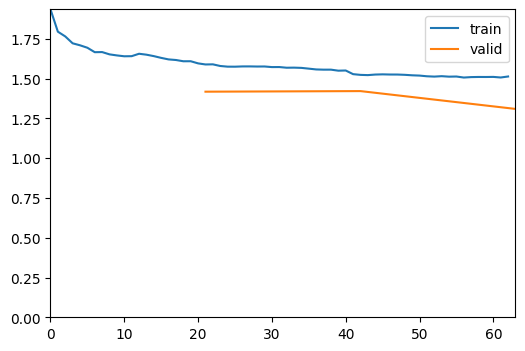

Better model found at epoch 2 with valid_loss value: 1.3099688291549683.


In [4]:
%matplotlib inline

flywheel.train_model(batch_size=32, epoch=3)

In [5]:
annotations_to_review = flywheel.get_most_wrong(method='top-loss')

INFO     - Identifying most incorrect examples... | data_flywheel.flywheel:get_most_wrong:92
INFO     - Losses returned by model: ['loss_cls', 'loss_bbox'] | icevision.models.interpretation:plot_top_losses:220


  0%|          | 0/161 [00:00<?, ?it/s]

In [ ]:
annotations_to_review

In [ ]:
flywheel.relabel_data()